In [1]:
%matplotlib inline

In [2]:
import ete3
import random

import numpy as np

from collections import Counter
from scipy import stats

import pandas as pd

from Bio import Phylo
from io import StringIO


# 2 things to simulate that would be great

In [ ]:
my_tree = ete3.Tree() # Creates an empty tree
A = my_tree.add_child(name="A", dist=1.0) 
B = A.add_sister(name="B", dist=1.0) 
C = my_tree.add_child(name="C", dist=1.0)

In [ ]:
my_tree.render('%%inline')

In [ ]:
for i in range(10):
    all_leaves = my_tree.get_leaves()
    choice = random.choice(all_leaves)
    choice.add_child(name="A", dist=1.0)
    choice.add_child(name="B", dist=1.0)

In [ ]:
my_tree.get_leaves()

In [ ]:
def create_pectinate(n=2):
    tree = ete3.Tree() # Creates an empty tree
    A = tree.add_child(name="", dist=1.) # Adds a new child to the current tree root
    B = tree.add_child(name="", dist=1.)
    top_node = A
    for i in range(n-2):
        temp_a = top_node.add_child(name="", dist=1.)
        temp_b = top_node.add_child(name="", dist=1.)
        top_node = temp_a
    return tree 

In [ ]:
tree = create_pectinate(32)
tree.render('%%inline')

# Pruning trees

In [ ]:
import string
letters = string.ascii_lowercase

In [ ]:
tree = ete3.Tree() # Creates an empty tree
A = tree.add_child(name='a', dist=1.) # Adds a new child to the current tree root
B = tree.add_child(name='', dist=1.)
top_node = B
for i in range(16-2):
#     temp_a = top_node.add_child(dist=1.)
#     temp_b = top_node.add_child(dist=1.)
    temp_a = top_node.add_child(name=letters[i+1], dist=1.)
    temp_b = top_node.add_child(name=letters[i+2], dist=1.)
    top_node = temp_b
print(len(tree.get_leaves()))
#ancestor.add_features(nodetype="internal")

In [ ]:
tree.render('%%inline')

In [ ]:
for node in tree.traverse():
    if len(node.get_children()) == 2:
        node.name = ''

In [ ]:
I_val

# All sweep

This algorithm uses (will use) recursive concatenation of small trees to build up a set of all

In [ ]:
%%timeit
size = 1000
split_dict = {}
split_dict[1] = []
l_array = np.array([i for i in range(1, (size//2)+1)])
r_array = np.zeros((size//2))
for smaller in range(2, size+1, 1):
    r_array[:smaller-1] += 1
    split_dict[smaller] = (l_array[:smaller//2], r_array[:smaller//2])
#     split_dict[smaller] = list(zip(l_array[:smaller//2], r_array[:smaller//2]))

# Uniform sampler using the "Dendrogram capacity" method

**First get dictionary of the number of possible trees for all values up to and including *n***

In [ ]:
n=8
n_trees_dict = {}
n_trees_dict[1] = 1

split_trees_dict = {}
probability_dict = {}
for tree in range(2, n+1):
    range_val = tree//2+1
    tots = []
    split_pairs = []
    for i in range(1, range_val):
        j = tree-i
        split_pairs.append((j,i))
        if i != j:
            tots.append(n_trees_dict[i]*n_trees_dict[j])
        else:
            tots.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
    total_possible = sum(tots)
    probability_dict[tree] = [i/total_possible for i in tots]
    n_trees_dict[tree] = total_possible
    split_trees_dict[tree] = split_pairs

In [ ]:
n_trees_dict[4], split_trees_dict[4], probability_dict[4]

In [ ]:
n_trees_dict[8], split_trees_dict[8], probability_dict[8]

In [ ]:
i=4
(((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i]

In [ ]:
split_trees_dict

In [ ]:
probability_dict

In [ ]:
# even_probability_dict = {}
# for i in range(2, 20//2+1):
#     options = split_trees_dict[i]
#     print(i, options)
#     prob_modifier = list(range(i-2, 0, -1))
#     print(prob_modifier)
even_probability_dict_l = {}
even_probability_dict_r = {}

for tree in range(2, n+1):
    print('######', tree)
    range_val = tree//2+1
    tots = []
    split_pairs = []
    for i in range(1, range_val):
        j = tree-i
#         if i != j:
#             continue
        print(j,i)
        split_pairs.append((j,i))
        if i != j:
            tots.append(n_trees_dict[i]*n_trees_dict[j])
        else:
            tots.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
    print(split_pairs)
    tots_l = tots*np.arange(len(split_pairs), 0, -1)
    tots_r = tots*np.arange(1, len(split_pairs)+1, 1)
    tots_l = list(tots_l)
    tots_r = list(tots_r)
    total_possible_l = sum(tots_l)
    total_possible_r = sum(tots_r)
    even_probability_dict_l[tree] = [i/total_possible_l for i in tots_l]
    even_probability_dict_r[tree] = [i/total_possible_r for i in tots_r]

#     split_trees_dict[tree] = split_pairs
    
    
#     l_side = []
#     all_to_all = split_trees_dict[]


In [ ]:
even_probability_dict_l

In [ ]:
even_probability_dict_r

In [ ]:
8+7+6+5+4+3+2+1

In [ ]:
def select_recursive(n, path, split_trees_dict, probability_dict, repeat_possibility=False):
#     if even_split == True:
        
#     else:
        
    index = np.random.choice(len(split_trees_dict[n]), p=probability_dict[n])
    choice = split_trees_dict[n][index]
#     print(choice)
    path.append(choice)

    l_split = choice[0]
    r_split = choice[1]
    if l_split != 1:
        if l_split == 2:
            path.append((1,1))
        else:
            path = select_recursive(l_split, path, split_trees_dict, probability_dict, repeat_possibility)

    ######################
    if l_split == r_split:
        ###DangerZone
        repeat_possibility = True
    ######################
    if r_split != 1:
        if r_split == 2:
            path.append((1,1))
        else:
            path = select_recursive(r_split, path, split_trees_dict, probability_dict, repeat_possibility)
    return path

In [ ]:
tmp = tuple(select_recursive(n, [], split_trees_dict, probability_dict))
assert len(tmp) == n-1

In [ ]:
listy = []
for i in range(200):
    tmp = tuple(select_recursive(n, [], split_trees_dict, probability_dict))
    assert len(tmp) == n-1
    listy.append(tmp)

In [ ]:
counter_dict = Counter(listy)
# assert len(counter_dict.keys()) == n_trees_dict[n]
print(counter_dict.values())

In [ ]:
len(counter_dict.keys()), n_trees_dict[n]

In [ ]:
for key, val in counter_dict.items():
    print(key, val)

In [ ]:
keys = counter_dict.keys()
for key in sorted(keys):
    print(key, counter_dict[key])

In [ ]:
n_trees_dict[7]

# Okay forget everything above here

In [ ]:
split_trees_dict

In [ ]:
sample_nonrecursive(10, split_trees_dict, probability_dict, l_probability_dict)

In [ ]:
n=12
listy = []
for i in range(1000):
    tmp = tuple(sample_nonrecursive(n, split_trees_dict, probability_dict, l_probability_dict))
#     assert len(tmp) == n-1
    listy.append(tmp)


In [ ]:
tupley = []
for i in listy:
    toft = tuple(tuple(x) for x in i)
    tupley.append(toft)
counter_dict = Counter(tupley)
print(len(counter_dict.keys()), n_trees_dict[n])
print(stats.chisquare(list(counter_dict.values())))
# counter_dict

In [ ]:
blah = 6
n_trees_dict[blah], (((blah**2)-blah)/2)+blah, split_trees_dict[blah]

In [ ]:
l_probability_dict[6], probability_dict[6], split_trees_dict[6]

In [ ]:
l_probability_dict[6]

In [ ]:
def sample_tree(n, split_trees_dict, probability_dict, l_probability_dict):
    ###Get the first split here
    init_index = np.random.choice(len(split_trees_dict[n]), p=probability_dict[n])
    init_choice = split_trees_dict[n][init_index]
    starting_list = [init_choice]
    if init_choice[0] == init_choice[1]:
        splits = select_recursive_left(init_choice, starting_list, split_trees_dict,\
                                  probability_dict, l_probability_dict, symmetry=True)
        splits = select_recursive_right(init_choice, starting_list, split_trees_dict,\
                                  probability_dict, l_probability_dict, symmetry=True)
    else:
        splits = select_recursive(init_choice[0], starting_list, split_trees_dict,\
                                  probability_dict, l_probability_dict)
        splits = select_recursive(init_choice[0], starting_list, split_trees_dict,\
                                  probability_dict, l_probability_dict)
    return splits


def select_recursive_rside(splits, path, split_trees_dict, probability_dict,\
                               l_probability_dict, l_index_choice):
    path.append(splits)
    if splits == (1,1):
        pass
    else:
        ###This introduces an asymmetry in choices between my two sides(!)
        l_split = splits[0]
        r_split = splits[1]
        l_index = np.random.choice(len(split_trees_dict[l_split]), p=l_probability_dict[l_split])
        l_choice = split_trees_dict[l_split][l_index]

        ###R split is now conditional on the choice of l-split! Perhaps this monstrosity should be re-computed
        ###but doing it separately here for now.
        if r_split == 1:
            r_choice = None
        else:
            naive = probability_dict[r_split]
            naive = naive*\
                np.concatenate((np.ones(l_index+1, dtype=object),\
                                np.zeros(len(naive)-(l_index+1), dtype=object)), axis=0)
            naive = list(naive)
            totals = sum(naive)
            adj_probs = [i/totals for i in naive]
            r_index = np.random.choice(len(split_trees_dict[r_split]), p=adj_probs)
            r_choice = split_trees_dict[r_split][r_index]
        if l_choice != r_choice:
            path = select_recursive(l_choice, path, split_trees_dict, probability_dict, l_probability_dict)
            if r_choice:
                path = select_recursive(r_choice, path, split_trees_dict, probability_dict, l_probability_dict)
        else:
            path = select_recursive_lside(l_choice, path, split_trees_dict,\
                                              probability_dict, l_probability_dict)
            if r_choice:
                path = select_recursive_rside(r_choice, path, split_trees_dict,\
                                                  probability_dict, l_probability_dict) 
        
    return path

def select_recursive_lside(n, path, split_trees_dict, probability_dict,\
                               l_probability_dict, symmetry=False):
    
    index = np.random.choice(len(split_trees_dict[n]), p=l_probability_dict[n])
    split = split_trees_dict[n][index]
    path.append(split)
  
    elif (split[0] == split[1]):
        path, l_lineage = select_recursive_lside(split[0], path, split_trees_dict, probability_dict, l_probability_dict) 
        path = select_recursive_rside(split[1], path, split_trees_dict, probability_dict, l_probability_dict) 

    
    
    if split == (1,1):
        pass
    else:
        ###This introduces an asymmetry in choices between my two sides(!)
        l_split = splits[0]
        r_split = splits[1]


        ###R split is now conditional on the choice of l-split! Perhaps this monstrosity should be re-computed
        ###but doing it separately here for now.
        if r_split == 1:
            r_choice = None
        else:
            naive = probability_dict[r_split]
            naive = naive*\
                np.concatenate((np.ones(l_index+1, dtype=object),\
                                np.zeros(len(naive)-(l_index+1), dtype=object)), axis=0)
            naive = list(naive)
            totals = sum(naive)
            adj_probs = [i/totals for i in naive]
            r_index = np.random.choice(len(split_trees_dict[r_split]), p=adj_probs)
            r_choice = split_trees_dict[r_split][r_index]
        if l_choice != r_choice:
            path = select_recursive(l_choice, path, split_trees_dict, probability_dict, l_probability_dict)
            if r_choice:
                path = select_recursive(r_choice, path, split_trees_dict, probability_dict, l_probability_dict)
        else:
            path = select_recursive_lside(l_choice, path, split_trees_dict,\
                                              probability_dict, l_probability_dict)
            probs = 
            if r_choice:
                path = select_recursive_rside(r_choice, path, split_trees_dict,\
                                                  probability_dict, l_probability_dict) 
        
    return path

def get_symmetric_lineages(l_side, r_side):
    l_lineage = []
    r_lineage = []
    while l_lineage == r_lineage:
        index = np.random.choice(len(split_trees_dict[l_val]), p=l_probability_dict[l_val])
        l_split = split_trees_dict[l_side][index]
        l_lineage.append(l_split)
        
        naive = probability_dict[r_side]
        naive = naive*\
            np.concatenate((np.ones(index+1, dtype=object),\
                            np.zeros(len(naive)-(index+1), dtype=object)), axis=0)
        naive = list(naive)
        totals = sum(naive)
        adj_probs = [i/totals for i in naive]
        r_index = np.random.choice(len(split_trees_dict[r_side]), p=adj_probs)
        r_split = split_trees_dict[r_side][r_index]
        r_lineage.append(r_split)
        
        l_side = l_split[0]
        r_side = r_split[0]
    return l_lineage, r_lineage


def select_recursive(n, path, split_trees_dict, probability_dict, l_probability_dict, symmetry=False):
    """
    Oooof this started out so clean and nice. Needs a re-do
    """
    index = np.random.choice(len(split_trees_dict[n]), p=probability_dict[n])
    split = split_trees_dict[n][index]
    path.append(split)

    if split == (1, 1):
        pass
    
    elif (split[0] != split[1]):
        for choice in split:
            if side != 1:
                path = select_recursive(choice, path, split_trees_dict, probability_dict, l_probability_dict)
                
    elif (splits[0] == splits[1]):
        ###Dive in until they differ
        l_lineage, r_lineage = get_symmetric_lineages()
        
        
        path, l_lineage = select_recursive_lside(split[0], path, split_trees_dict, probability_dict, l_probability_dict) 
        path = select_recursive_rside(split[1], path, split_trees_dict, probability_dict, l_probability_dict) 

    return path

# def select_recursive(splits, path, split_trees_dict, probability_dict, l_probability_dict):
#     """
#     Oooof this started out so clean and nice. Needs a re-do
#     """
#     path.append(splits)
#     if splits == (1, 1):
#         pass
    
#     elif (splits[0] != splits[1]) or (splits[0] in [2,3]):
#         for split in splits:
#             if split != 1:
#                 index = np.random.choice(len(split_trees_dict[split]), p=probability_dict[split])
#                 choice = split_trees_dict[split][index]
#                 path = select_recursive(choice, path, split_trees_dict, probability_dict, l_probability_dict)
#     else:
#         ###This whole thing is equivalent to sampling from the upper triangle (including identity) of a matrix
#         split = splits[0]
#         l_index = np.random.choice(len(split_trees_dict[split]), p=l_probability_dict[split])
#         l_choice = split_trees_dict[split][l_index]
#         path = select_recursive(l_choice, path, split_trees_dict, probability_dict, l_probability_dict)
        
#         ###R split is conditional on the choice of l-split! Perhaps this monstrosity should be re-computed
#         ###but doing it separately here for now.
#         naive = probability_dict[split]
#         naive = naive*\
#             np.concatenate((np.ones(l_index+1, dtype=object),\
#                             np.zeros(len(naive)-(l_index+1), dtype=object)), axis=0)
#         naive = list(naive)
#         totals = sum(naive)
#         adj_probs = [i/totals for i in naive]
#         r_index = np.random.choice(len(split_trees_dict[split]), p=adj_probs)
#         r_choice = split_trees_dict[split][r_index]
#         if r_choice == l_choice:
#             pass
#         path = select_recursive(r_choice, path, split_trees_dict, probability_dict, l_probability_dict)
        
#     return path

In [ ]:
l_probability_dict[4]

In [ ]:
naive = probability_dict[5]
l_index = 0
naive = naive*\
            np.concatenate((np.ones(l_index+1, dtype=object),\
                            np.zeros(len(naive)-(l_index+1), dtype=object)), axis=0)
naive = list(naive)
totals = sum(naive)
adj_probs = [i/totals for i in naive]
r_index = np.random.choice(len(split_trees_dict[5]), p=adj_probs)
r_choice = split_trees_dict[5][r_index]
naive, totals, adj_probs, r_choice

**Build up the necessary dictionaries**

In [ ]:
n=10
n_trees_dict = {}
n_trees_dict[1] = 1

split_trees_dict = {}
probability_dict = {}
for tree in range(2, n+1):
    range_val = tree//2+1
    tots = []
    split_pairs = []
    for i in range(1, range_val):
        j = tree-i
        split_pairs.append((j,i))
        if i != j:
            tots.append(n_trees_dict[i]*n_trees_dict[j])
        else:
            tots.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
    total_possible = sum(tots)
    probability_dict[tree] = [i/total_possible for i in tots]
    n_trees_dict[tree] = total_possible
    split_trees_dict[tree] = split_pairs
    
####I might be able to accomplish the same thing by just multiplying these by the probabilities above...hmm
l_probability_dict = {}
for tree in range(2, n+1):
    range_val = tree//2+1
    tots = []
    split_pairs = []
    for i in range(1, range_val):
        j = tree-i
        split_pairs.append((j,i))
        if i != j:
            tots.append(n_trees_dict[i]*n_trees_dict[j])
        else:
            tots.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
#     tots_l = tots*np.arange(len(split_pairs), 0, -1, dtype=object)

    tots_l = tots*np.arange(1, len(split_pairs)+1, 1, dtype=object)
    tots_l = list(tots_l)
#     print(tots_l)
    total_possible_l = sum(tots_l)
    l_probability_dict[tree] = [i/total_possible_l for i in tots_l]

**Running the sampler**

In [ ]:
listy = []
for i in range(10000):
    tmp = tuple(sample_tree(n, split_trees_dict, probability_dict, l_probability_dict))
#     print(tmp)
    assert len(tmp) == n-1
    listy.append(tmp)

In [ ]:
counter_dict = Counter(listy)
# counter_dict

In [ ]:
stats.chisquare(list(counter_dict.values()))

In [ ]:
len(counter_dict.keys()), n_trees_dict[n]

In [ ]:
for key, val in counter_dict.items():
#     if key[0]==(5,5):
    if key[0]==(5,5) and key[1]==(4,1):
#     if key[0]==(6,6) and key[1]==(5,1):
        print(key, val)

In [ ]:
n_trees_dict[6], n_trees_dict[5]

In [ ]:
np.concatenate((np.zeros(1, dtype=object), np.ones(2-1, dtype=object)), axis=0)

# Begrudgingly using the array tables...

In [ ]:
def build_table_sparse(n):
    n_trees_dict = {}
    n_trees_dict[1] = 1
    tree_list = [1]
    lside = [1]
    rside = [None]
    for tree in range(2, n+1):
        range_val = tree//2+1
        tots = []
        split_pairs = []
        for i in range(1, range_val):
            j = tree-i
            split_pairs.append((j,i))
            tree_list.append(tree)
            lside.append(j)
            rside.append(i)
            if i != j:
                tots.append(n_trees_dict[i]*n_trees_dict[j])
            else:
                tots.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
        total_possible = sum(tots)
        n_trees_dict[tree] = total_possible
    
    df = pd.DataFrame(list(zip(tree_list, lside, rside)), dtype=object)

    return df, n_trees_dict

def build_table_full(n):
    df = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1]], index=[0], dtype=object)
    counter = 1

    n_trees_dict = {}
    n_trees_dict[1] = 1

    
    for tree in range(2, n+1):
        range_val = tree//2+1
        tots = []
        split_pairs = []
        for i in range(1, range_val):
            j = tree-i
            split_pairs.append((j,i))
            
        for j,i in split_pairs:
            df.at[counter, 0] = tree
            df.at[counter, 1] = j
            df.at[counter, 2] = i
            if i != j:
                df.at[counter, 5] = n_trees_dict[i]*n_trees_dict[j]
                tots.append(n_trees_dict[i]*n_trees_dict[j])
            else:
                df.at[counter, 5] = (((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i]
                tots.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
            df.at[counter, 3] = n_trees_dict[j]
            df.at[counter, 4] = n_trees_dict[i]
            df.at[counter, 6]= df[df[0]==tree][5].sum()
            counter += 1

        total_possible = df[df[0]==tree][5].sum()
#         total_possible = sum(tots)
        n_trees_dict[tree] = total_possible
            
    return df, n_trees_dict

# def build_tree_full(df, n_trees_dict, n_leaves):
#     '''
#     Maybe this is where my recursive algorithm could/should lie?
#     '''
#     #Start by first looking at the end of the df
#     n_trees = n_trees_dict[n]
#     #Establishing which_tree I want to grab
#     tree_index = random.randint(1, n_trees)
        
#     possible_set = df[df[0]==n_leaves]
#     line, n_within = select_line(possible_set, tree_index)

#     l_n, r_n = select_descendants(n_within, df[df[0]==line[1]].iloc[-1][6], df[df[0]==line[2]].iloc[-1][6])
#     #Now need line and index of these children
#     l_child_set = df[df[0]==line[1]]
#     l_line, l_n_within = select_line(l_child_set, l_n)
#     r_child_set = df[df[0]==line[2]]
#     r_line, r_n_within = select_line(r_child_set, r_n)

#     my_tree = ete3.Tree()
#     l_split = my_tree.add_child(name=(l_line.name, l_n_within)) 
#     r_split = my_tree.add_child(name=(r_line.name, r_n_within)) 
#     my_tree = build_recursive_full(my_tree, my_tree, df)
#     return my_tree

# def build_recursive_full(my_tree, node, df):
#     if node.children == []:
#         return my_tree
#     for child_node in node.children:
#         if child_node.name[0] != 0:
#             child_name, child_n = child_node.name
#             line = df.loc[child_name]
#             ###How many options were there
#             level = df[df[0]==line[0]]
#             l_n, r_n = select_descendants(child_n,\
#                                      df[df[0]==line[1]].iloc[-1][6], df[df[0]==line[2]].iloc[-1][6])
#             #Now need line and index of these children
#             l_child_set = df[df[0]==line[1]]
#             l_line, l_n_within = select_line(l_child_set, l_n)
#             r_child_set = df[df[0]==line[2]]
#             r_line, r_n_within = select_line(r_child_set, r_n)
            
#             l_split = child_node.add_child(name=(l_line.name, l_n_within)) 
#             r_split = child_node.add_child(name=(r_line.name, r_n_within))     
#             my_tree = build_recursive_full(my_tree, child_node, df)

#     return my_tree

# def select_line(df, index):
#     try:
#         line_before = df[df[6]<index].iloc[-1]
#         return df.loc[line_before.name+1], index-line_before[6]
#     except IndexError:
#         line = df.iloc[0]
#         return line, index
    
# def select_descendants(i, l_trees, r_trees):
#     """
#     Technically not just selecting the square with this update...
#     """
#     if l_trees != r_trees:
#         lside = (i-1)%l_trees+1
#         rside = ((i-1)//l_trees)+1
#     else:
#         lside, rside = tri_indices(i-1, l_trees)
#         lside += 1
#         rside += 1
#     return lside, rside

In [ ]:
####This might actually work!
def tri_indices(i, mat_len):
    ii = (mat_len*(mat_len+1))//2-1-i
#     K = floor((sqrt((8*ii)+1)-1)/2)
    K = (isqrt(8*ii+1)-1)//2
    row = mat_len-1-K
    return row, i - (mat_len*(mat_len-1)//2) + ((mat_len-row)*((mat_len-row)-1))//2

def isqrt(n):
    """
    Need to upgrade to python 3.8 for math.isqrt()
    """
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x


###Testing my triangle indices
# from numpy import triu_indices, sqrt
# n = 200
# for k in range((n**2-n)//2+n):
#     i, j = mat_indices(k, n)
#     assert np.triu_indices(n, k=0)[0][k] == i
#     assert np.triu_indices(n, k=0)[1][k] == j, print('###',np.triu_indices(n, k=0)[1][k], j)

In [ ]:
# %%timeit
# df = build_table_full(10)
# df, trash = build_table_sparse(10)

In [ ]:
n = 8
df, n_trees_dict = build_table_full(n)
testy = []
for i in range(20):
    tree = build_tree_full(df, n_trees_dict, n)
    tree.name = ''
    for node in tree.get_descendants():
        node.name = ''
    assert len(tree.get_leaves()) == n
    testy.append(tree.write('newick', format=100))

In [ ]:
# Phylo.draw(Phylo.read(StringIO(testy[0]), 'newick'))

In [ ]:
counter_dict = Counter(testy)
print(len(counter_dict.values()))
print(stats.chisquare(list(counter_dict.values())))

In [ ]:
for newick in counter_dict.keys():
    print(counter_dict[newick])
    Phylo.draw(Phylo.read(StringIO(newick), 'newick'))

# A more reasonable run-time solution...perhaps

In [3]:
####This might actually work!
def triu_indices_AJH(i, mat_len):
    """
    This function gets the triangular indices from a square matrix (including the diagonal). 
    It was developed with a bit of guess and check and using some functions/solutions I found 
    online but it looks robust. Should be tested more extensively but my test against numpy triu_indices()
    works well (and this of course skips the matrix building step).
    
    Critical differences to some fxns found online were making sure it runs on integer math to handle
    enormous numbers.
    
    Relies on isqrt, which should be the python implementation in >3.8 but Newton's method works (slowly)
    
    Inputs:
        i - the linear index of interest
        m - the dimensions of one side of the square matrix
        
    Outputs
        row index
        column index
    """
    ii = (mat_len*(mat_len+1))//2-1-i
    K = (isqrt(8*ii+1)-1)//2
    row = mat_len-1-K
    return row, i - (mat_len*(mat_len-1)//2) + ((mat_len-row)*((mat_len-row)-1))//2


def triu_accuracy_test(max_n_to_test):
    """
    Tests the accuracy of my triangle indices test compared to numpy.
    The advantage of mine is not having to actually build the matrix and instead work directly 
    with the dimensions.
    
    Will run slowly so am arbitrarily limiting max_n_to_test to 200
    """
    if max_n_to_test > 100:
        max_n_to_test = 100
        print("Setting max variable to test to 100, test takes a long time otherwise.")
    for n in range(1, max_n_to_test+1):
        for k in range(((n**2-n)//2)+n):
            i, j = triu_indices_AJH(k, n)
            assert np.triu_indices(n, k=0)[0][k] == i
            assert np.triu_indices(n, k=0)[1][k] == j, print('###',np.triu_indices(n, k=0)[1][k], j)

def isqrt(n):
    """
    Integer square root. Need to upgrade to python 3.8 for math.isqrt()
    """
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2
    return x

In [4]:
def build_dicts(n):
    ###The dictionary that will hold the number of possible trees with a given number of leaves
    n_trees_dict = {}
    ###It has a few quirks that need to be added manually
    n_trees_dict[np.nan] = np.nan
    n_trees_dict[1] = 1
    
    ###Establishing the arrays that hold the number of downstream children on the left and right
    ###sides of a bifurcation
    l_side = [1]
    r_side = [np.nan]
    ###A pointer dictionary that tracks where in those arrays trees with a given number of leaves reside
    pointer_dict = {}
    pointer_dict[1] = (0, 0) #i.e. the first index contains trees related to 1 downstream leaf
    
    ###Build up the quantities
    for tree in range(2, n+1):
        starting_index = len(l_side)
        range_val = tree//2+1
        totals = []
        for i in range(1, range_val):
            j = tree-i
            l_side.append(j)
            r_side.append(i)
            if i!=j:
                totals.append(n_trees_dict[i]*n_trees_dict[j])
            else:
                totals.append((((n_trees_dict[i]**2)-n_trees_dict[i])//2)+n_trees_dict[i])
        ending_index = len(l_side)-1
        totals = sum(totals)
        n_trees_dict[tree] = totals
        pointer_dict[tree] = (starting_index, ending_index)
    return l_side, r_side, n_trees_dict, pointer_dict 


def build_tree_full(lside_arr, rside_arr, n_trees_dict, pointer_dict, n_leaves):
    '''
    Maybe this is where my recursive algorithm could/should lie?
    '''
    #Start by first looking at the end of the df
    n_trees = n_trees_dict[n]
    #Establishing the index of the tree that I want to grab
    tree_index = random.randint(0, n_trees-1)
    #Getting the number of descendants and index within that set
    l_children, r_children, n_within = select_index(pointer_dict,\
                                                    lside_arr, rside_arr, n_trees_dict, tree_index, n)

    l_index, r_index = select_descendants(l_children, r_children, n_within, n_trees_dict)
    
    l_l_children, l_r_children, l_n_within = select_index(pointer_dict,\
                                                lside_arr, rside_arr, n_trees_dict, l_index, l_children)
    
    r_l_children, r_r_children, r_n_within = select_index(pointer_dict,\
                                                lside_arr, rside_arr, n_trees_dict, r_index, r_children)

    my_tree = ete3.Tree()
    l_split = my_tree.add_child(name=(l_l_children, l_r_children, l_n_within)) 
    r_split = my_tree.add_child(name=(r_l_children, r_r_children, r_n_within)) 
    my_tree = build_recursive_full(my_tree, my_tree, lside_arr, rside_arr, n_trees_dict, pointer_dict)
    return my_tree

def select_index(pointer_dict, lside_arr, rside_arr, n_trees_dict, tree_index, n):
    """
    The real problem is that I'm generating these values at each call
    but like if I don't, I'll have to store them and for large n (>100)
    this gets positively enormous/prohibitive.
    
    So instead, I generate this on the fly each time around? 
    """
    if n == 1:
        return np.nan, np.nan, 0
    lside_temp = np.array(lside_arr[pointer_dict[n][0]:pointer_dict[n][1]+1], dtype=object)
    rside_temp = np.array(rside_arr[pointer_dict[n][0]:pointer_dict[n][1]+1], dtype=object)
    lside_trees = np.array([n_trees_dict[i] for i in lside_temp], dtype=object)
    rside_trees = np.array([n_trees_dict[i] for i in rside_temp], dtype=object)
    multiplied = lside_trees*rside_trees
    multiplied[lside_temp==rside_temp] = 0
    triangularized = ((lside_trees**2 - lside_trees)//2)+lside_trees
    triangularized[lside_temp!=rside_temp] = 0
    combined = np.cumsum(multiplied + triangularized)

    line_index = np.argmax(combined>tree_index)
    if line_index == 0:
        index_within = tree_index
    else:
        index_within = tree_index - combined[line_index-1]
    l_children = lside_temp[line_index]
    r_children = rside_temp[line_index]
    return l_children, r_children, index_within


    
def select_descendants(l_children, r_children, index_within, n_trees_dict):
    """
    Technically not just selecting the square with this update...
    """
    if l_children != r_children:
        l_trees = n_trees_dict[l_children]
        r_trees = n_trees_dict[r_children]
        lside = (index_within)%l_trees
        rside = ((index_within)//l_trees)
    else:
        l_trees = n_trees_dict[l_children]
        lside, rside = triu_indices_AJH(index_within, l_trees)
    return lside, rside



def build_recursive_full(my_tree, node, lside_arr, rside_arr, n_trees_dict, pointer_dict):
    if node.children == []:
        return my_tree
    for child_node in node.children:
        if child_node.name != (np.nan, np.nan, 0):
            l_children, r_children, n_within = child_node.name
            
            l_index, r_index = select_descendants(l_children, r_children, n_within, n_trees_dict)
            
            l_l_children, l_r_children, l_n_within = select_index(pointer_dict,\
                                            lside_arr, rside_arr, n_trees_dict, l_index, l_children)
    
            r_l_children, r_r_children, r_n_within = select_index(pointer_dict,\
                                                lside_arr, rside_arr, n_trees_dict, r_index, r_children)

            l_split = child_node.add_child(name=(l_l_children, l_r_children, l_n_within)) 
            r_split = child_node.add_child(name=(r_l_children, r_r_children, r_n_within))     
            my_tree = build_recursive_full(my_tree, child_node,\
                                           lside_arr, rside_arr, n_trees_dict, pointer_dict)
    return my_tree



In [19]:
n = 1024
l_side, r_side, n_trees_dict, pointer_dict = build_dicts(n)
testy = []
for i in range(100):
    tree = build_tree_full(l_side, r_side, n_trees_dict, pointer_dict, n)
    tree.name = ''
    for node in tree.get_descendants():
        node.name = ''
    assert len(tree.get_leaves()) == n, len(tree.get_leaves())
    testy.append(tree.write('newick', format=100))

In [20]:
counter_dict = Counter(testy)
print(len(counter_dict.values()))
print(stats.chisquare(list(counter_dict.values())))

100
Power_divergenceResult(statistic=0.0, pvalue=1.0)


In [ ]:
# for newick in counter_dict.keys():
#     print(counter_dict[newick])
#     Phylo.draw(Phylo.read(StringIO(newick), 'newick'))

In [21]:
for i, j in enumerate(counter_dict.keys()):
    with open('../{}_uniform_{}.newick'.format(1024, i), 'w') as outfile:
        outfile.write(j)

In [22]:
def colless_I(tree, normalized=False):
    """
    Should really figure out a recursive solution to this problem.
    
    Seems like only using the prior value and the value from one side could ~halve the run time
    
    Another normalization scheme is the expected under BD model, let
    first_part = ((2*n_leaves) / (n_leaves-1) * (n_leaves-2))
    
    if n_leaves is even:
    first_part * np.sum(1./np.arange(2,n_leaves/2))
    if odd:
    first_part * ((1/n_leaves) + np.sum(1./np.arange(2,(n_leaves-1)/2)))


    """
    node_diff = []
    for node in tree.traverse():
        try:
            a, b = node.get_children()
        except ValueError:
            continue
        node_diff.append(np.abs(len(a.get_leaves())-len(b.get_leaves())))
    index_val = np.sum(node_diff)
    if normalized:
        n_leaves = len(tree.get_leaves())
        return index_val/(((n_leaves-1)*(n_leaves-2))/2.)
    else:
        return index_val
    
for i, tree in enumerate(testy):
    print(i, colless_I(ete3.Tree(tree, format=100)))

0 28361
1 32109
2 62705
3 38912
4 35060
5 62744
6 50774
7 48558
8 61041
9 45919
10 83993
11 43588
12 61239
13 54588
14 55030
15 75780
16 43250
17 40924
18 38883
19 48855
20 49310
21 32554
22 43282
23 42163
24 53475
25 64032
26 34027
27 70842
28 40242
29 29935
30 38861
31 33838
32 51150
33 54348
34 35313
35 42390
36 33516
37 50291
38 39481
39 38677
40 74360
41 60125
42 29082
43 32980
44 30677
45 30160
46 72086
47 44777
48 47154
49 37047
50 48873
51 53409
52 37091
53 62023
54 48827
55 56599
56 32901
57 42422
58 60885
59 54891
60 42778
61 31310
62 41848
63 41418
64 49518
65 39095
66 53074
67 39950
68 39758
69 24010
70 53475
71 52159
72 32548
73 46378
74 19329
75 33712
76 38676
77 84011
78 54280
79 61661
80 49100
81 71058
82 48653
83 45860
84 33919
85 47420
86 57381
87 51545
88 66269
89 61712
90 28044
91 39604
92 52776
93 26321
94 54013
95 57108
96 35658
97 40901
98 39991
99 65163


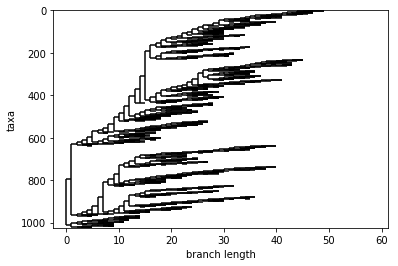

In [24]:
Phylo.draw(Phylo.read(StringIO(testy[74]), 'newick'))

In [ ]:
def build_recursive_full(my_tree, node, df):
    if node.children == []:
        return my_tree
    for child_node in node.children:
        if child_node.name[0] != 0:
            child_name, child_n = child_node.name
            line = df.loc[child_name]
            ###How many options were there
            level = df[df[0]==line[0]]
            l_n, r_n = select_descendants(child_n,\
                                     df[df[0]==line[1]].iloc[-1][6], df[df[0]==line[2]].iloc[-1][6])
            #Now need line and index of these children
            l_child_set = df[df[0]==line[1]]
            l_line, l_n_within = select_line(l_child_set, l_n)
            r_child_set = df[df[0]==line[2]]
            r_line, r_n_within = select_line(r_child_set, r_n)
            
            l_split = child_node.add_child(name=(l_line.name, l_n_within)) 
            r_split = child_node.add_child(name=(r_line.name, r_n_within))     
            my_tree = build_recursive_full(my_tree, child_node, df)

    return my_tree


